# PART 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
import warnings
warnings.filterwarnings('ignore')

<h3>1)</h3>

In [2]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/ORDINARY_TSTORM_2D/run'

In [3]:
ds = xr.open_dataset(path + '/cm1out_stats.nc')

In [4]:
time = ds['time']
wmax = ds['wmax']

In [5]:
time_x = np.arange(0,61,1)

Text(0.5, 1.0, 'MAX VERTICAL VELOCITY TIME SERIES')

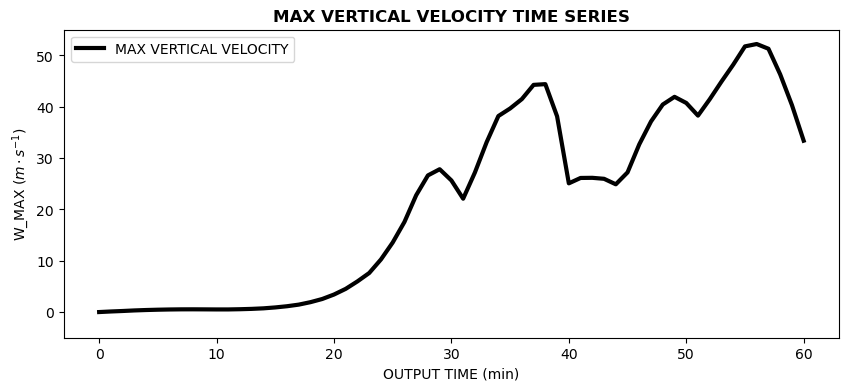

In [6]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
ax.plot(time_x, wmax, linewidth=3,
        color='k', label='MAX VERTICAL VELOCITY')
ax.legend()
ax.set_xlabel('OUTPUT TIME (min)')
ax.set_ylim(-5,55)
ax.set_ylabel(r'W_MAX ($ m \cdot s^{-1}) $')
ax.set_title('MAX VERTICAL VELOCITY TIME SERIES',
             fontweight='bold')

In general, the maximum vertical velocity increases from the start of the simulation to the end. It is relatively unchanging from 0-20 min, increases sharply from 10 m/s to 30 m/s from 20 to just before 30 min, then decreases abrupty to about 20 m/s by 30 min. After that, it increases sharpy again to 45 m/s just after 35 min. It decreases abruptly to 25 m/s or so up to 40 min. After that, it is steady through 45 min. It increases fairly sharpy through just before 50 min to just over 40 m/s. It then decreases through 50 min to just under 40 m/s. After that, it climbs for the last time through 55 min to just over 50 m/s. Then it falls to about 35 m/s through the end of the simulation. 

<h3>2)</h3>

In [7]:
ds = xr.open_dataset(path + '/cm1out.nc')

In [8]:
ds = ds.isel(time=30)

In [9]:
x = ds['xh']
z = ds['zh']
buoy = ds['buoyancy']
w = ds['winterp']
u = ds['uinterp']
bvppgf = ds['pgradb']

Text(0.5, 1.0, 'BUOYANCY, W, IN PLANE WINDS, $\\mathbf{VPPGA}_{\\mathbf{B}}$')

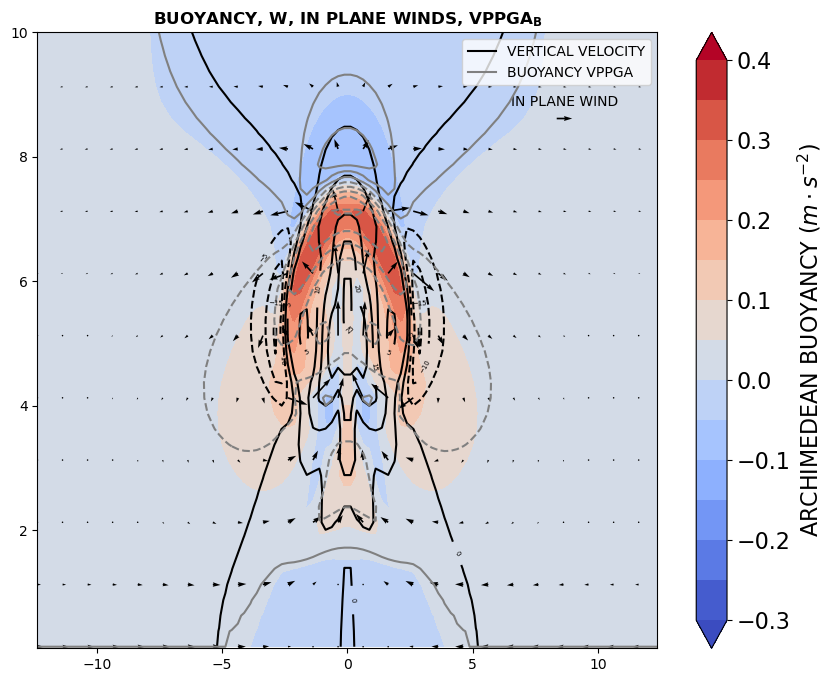

In [44]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
cf = ax.contourf(x, z, buoy.isel(yh=0),cmap='coolwarm',
           levels=np.arange(-.3,.45,.05), extend='both')
cbar = fig.colorbar(cf)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'ARCHIMEDEAN BUOYANCY ($m \cdot s^{-2}$)',fontsize=16)
cl1 = ax.contour(x, z, w.isel(yh=0), colors='k', 
                 levels=np.arange(-15,30,5))
ax.clabel(cl1,fontsize=5)
skip=4
q = ax.quiver(x[::skip],z[::skip],
          u.isel(yh=0)[::skip,::skip],
          w.isel(yh=0)[::skip,::skip],
          scale=400)   
ax.quiverkey(q,X=.85,Y=.86,U=10,label='IN PLANE WIND')
cl2 = ax.contour(x, z, bvppgf.isel(yh=0,zf=slice(0,80)), colors='gray',
                levels=np.arange(-0.25, 0.25, .05),
                alpha=1)

black_line = mlines.Line2D([], [], color='k', label='VERTICAL VELOCITY')
gray_line = mlines.Line2D([], [], color='gray', alpha=1, label='BUOYANCY VPPGA')

ax.set_ylim(.1,10)


ax.legend(handles=[black_line, gray_line], loc='upper right')
ax.set_title(r'BUOYANCY, W, IN PLANE WINDS, $\mathbf{VPPGA}_{\mathbf{B}}$', fontweight='bold')

In the above figure, the colorbar is Archimedean buoyancy, the black contours are vertical velocity (solid positive, dashed negative), the gray contours are buoyancy vertical perturbation pressure gradient acceleration (solid positive, dashed negative), and the vectors are in-plane wind. We see a positively buoyant pulse ascending in the middle of the domain. It is consistent with the definition of a thermal. There is an updraft through its core and downdrafts on either side, associated with two counter-rotating toroidal circulations. This is also consistent with the definition of a thermal. There is a downward directed perturbation pressure gradient acceleration from buoyancy on the top of the thermal, also consitent with a thermal definition. Though it is concentrated, or squashed, on the top of the thermal as compared to qualitative schematics that we've looked at. You can see the toroidal circulations moving outward, down, and inward as you descent from 7.5 to 2.5 km on either side of the buoyancy maximum. 

<h3>3)</h3>

In [11]:
nlvppgf = ds['pgraddn']

In [12]:
nlvppgf.min(), nlvppgf.max()

(<xarray.DataArray 'pgraddn' ()> Size: 4B
 array(-0.15426995, dtype=float32)
 Coordinates:
     time     timedelta64[ns] 8B 00:30:00,
 <xarray.DataArray 'pgraddn' ()> Size: 4B
 array(0.29891074, dtype=float32)
 Coordinates:
     time     timedelta64[ns] 8B 00:30:00)

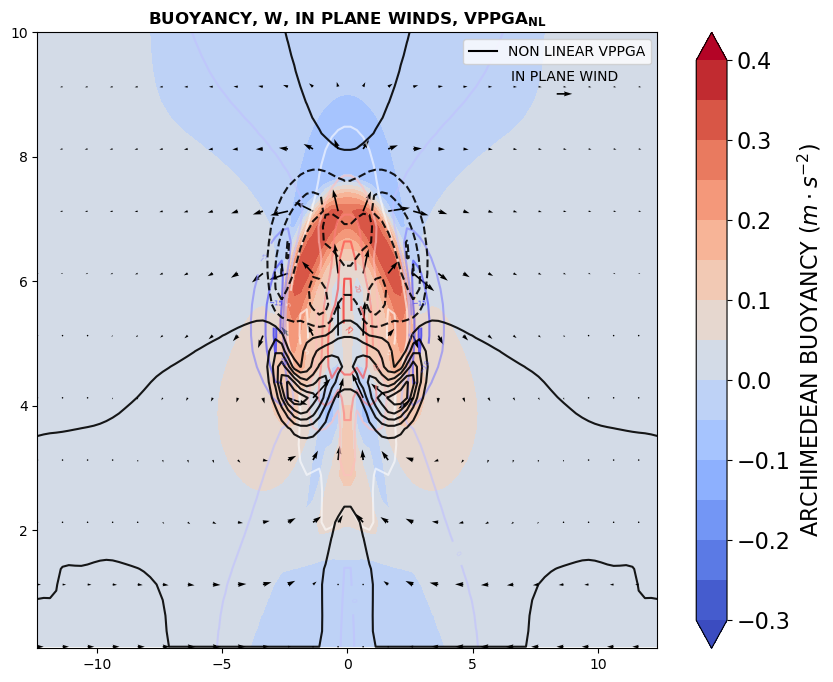

In [46]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
cf = ax.contourf(x, z, buoy.isel(yh=0),cmap='coolwarm',
           levels=np.arange(-.3,.45,.05), extend='both')
cbar = fig.colorbar(cf)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'ARCHIMEDEAN BUOYANCY ($m \cdot s^{-2}$)',fontsize=16)
cl1 = ax.contour(x, z, w.isel(yh=0), cmap='bwr', alpha=.6, 
                 levels=np.arange(-15,30,5))
ax.clabel(cl1,fontsize=5)
skip=4
q = ax.quiver(x[::skip],z[::skip],
          u.isel(yh=0)[::skip,::skip],
          w.isel(yh=0)[::skip,::skip],
          scale=400)   
ax.quiverkey(q,X=.85,Y=.90,U=10,label='IN PLANE WIND')
cl2 = ax.contour(x, z, nlvppgf.isel(yh=0,zf=slice(0,80)), colors='k',
                levels=np.arange(-0.15, 0.35, .05),
                alpha=.9)

#black_line = mlines.Line2D([], [], color='k', alpha=1, label='VERTICAL VELOCITY')
gray_line = mlines.Line2D([], [], color='k', alpha=1, label='NON LINEAR VPPGA')

ax.set_ylim(.1,10)

ax.legend(handles=[gray_line], loc='upper right')
ax.set_title(r'BUOYANCY, W, IN PLANE WINDS, $\mathbf{VPPGA}_{\mathbf{NL}}$', fontweight='bold');

The above figure is the same as question 2, but the black contours are now the nonlinear dynamic perturbation pressure acceleration. The blue to white to red contours are now the vertical velocity. The white contour is the 5 m/s updraft. All else being the same, we can now see positive accelerations below the thermal, associated with deformation from acceleration. We do not see evidence of deformation from deceleration at the top of the thermal however. We see negative quantities of the term both on top of the thermal, and within the upper portion of the toroidal circulations. This is associated with negative pressure perturbations owing to rotation. We do expect to see this, but I would've thought it to be more within the center of the circulations.

<h3>4)</h3>

No, you can't plot the linear vertical perturbation pressure acceleration term. Since there is no vertical wind shear, the term is 0. 

The linear component is:

$ \frac{\partial \overline{u}}{\partial z}  \frac{\partial {w'}}{\partial x} +
\frac{\partial \overline{v}}{\partial z}  \frac{\partial {w'}}{\partial y} $

Given that there is no shear:

$ {0}  \frac{\partial {w'}}{\partial x} +
{0} \frac{\partial {w'}}{\partial y} $

So the equation reduces to:

0

# PART 2

<h3>5)</h3>

In [14]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SQUALL_LINE_RUNS_2D/'
ds1 = xr.open_dataset(path + 'WEAK_SHEAR/run/cm1out.nc')
ds2 = xr.open_dataset(path + 'STRONG_SHEAR/run/cm1out.nc')

In [15]:
ds1 = ds1.isel(time=0,xh=0,yh=0)
u1 = ds1['uinterp']
v1 = ds1['vinterp']
ds2 = ds2.isel(time=0,xh=0,yh=0)
u2 = ds2['uinterp']
v2 = ds2['vinterp']

In [16]:
from metpy.plots import Hodograph

Text(5, 0.5, '2.75 km')

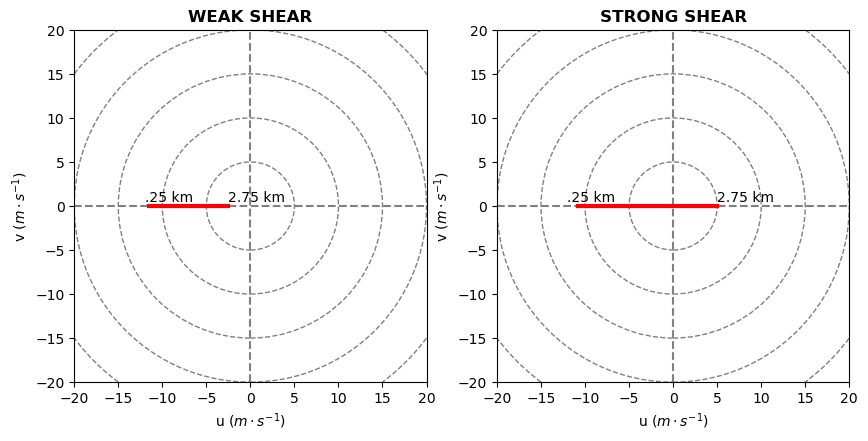

In [17]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

h = Hodograph(ax1, component_range=20)
h.add_grid(increment=5)
h.plot(u1,v1,color='red')

h = Hodograph(ax2, component_range=20)
h.add_grid(increment=5)
h.plot(u2,v2,color='red')

ax1.set_xlabel(r'u ($m \cdot s^{-1}$)')
ax2.set_xlabel(r'u ($m \cdot s^{-1}$)')
ax1.set_ylabel(r'v ($m \cdot s^{-1}$)')
ax2.set_ylabel(r'v ($m \cdot s^{-1}$)')

ax1.set_title('WEAK SHEAR', fontweight='bold')

ax2.set_title('STRONG SHEAR', fontweight='bold')

ax1.text(-12,.5,'.25 km')
ax1.text(-2.5,.5,'2.75 km')

ax2.text(-12,.5,'.25 km')
ax2.text(5,.5,'2.75 km')

<h3>6)</h3>

In [18]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SQUALL_LINE_RUNS_2D/'
ds1 = xr.open_dataset(path + 'WEAK_SHEAR/run/cm1out_stats.nc')
ds2 = xr.open_dataset(path + 'STRONG_SHEAR/run/cm1out_stats.nc')

In [19]:
time1 = ds1['time']
wmax1 = ds1['wmax']
time_x1 = np.arange(0,181,1)
time2 = ds2['time']
wmax2 = ds2['wmax']
time_x2 = np.arange(0,181,1)

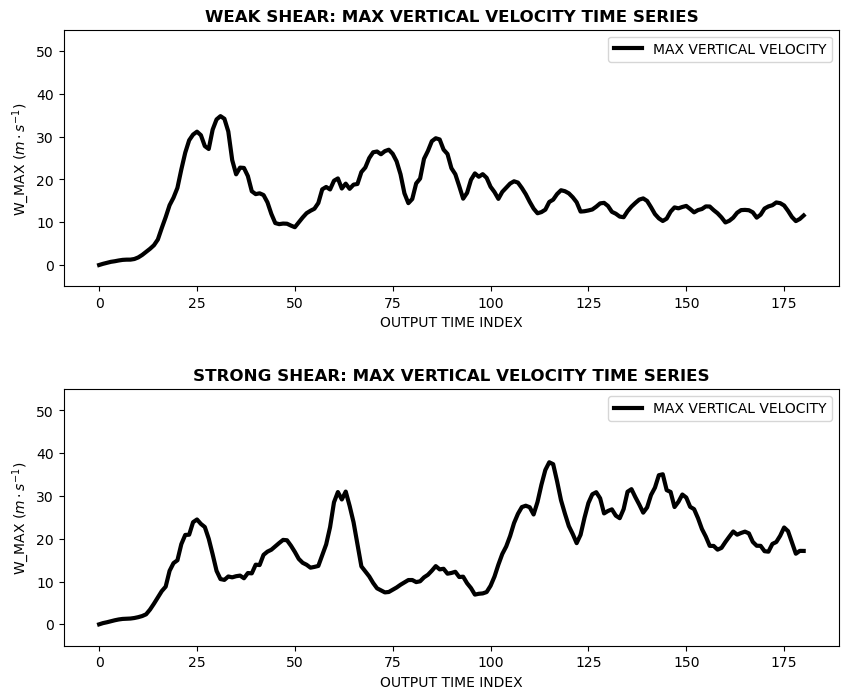

In [20]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.4)
fig.tight_layout()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(time_x1, wmax1, linewidth=3,
        color='k', label='MAX VERTICAL VELOCITY')
ax1.legend()
ax1.set_xlabel('OUTPUT TIME INDEX')
ax1.set_ylim(-5,55)
ax1.set_ylabel(r'W_MAX ($ m \cdot s^{-1}) $')
ax1.set_title('WEAK SHEAR: MAX VERTICAL VELOCITY TIME SERIES',
             fontweight='bold')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(time_x2, wmax2, linewidth=3,
        color='k', label='MAX VERTICAL VELOCITY')
ax2.legend()
ax2.set_xlabel('OUTPUT TIME INDEX')
ax2.set_ylim(-5,55)
ax2.set_ylabel(r'W_MAX ($ m \cdot s^{-1}) $')
ax2.set_title('STRONG SHEAR: MAX VERTICAL VELOCITY TIME SERIES',
             fontweight='bold');

Both the weak and strong shear cases experience variability in their maximum vertical velocity throughout the simulation. In the weak shear case, the index time of maximum vertical velocity is earlt in the simulation, just after the 25th output time. In the strong shear case, the maximum vertical velocity is not attained until around the 115th-120th output time, in the later third of the simulation. 

<h3>7)</h3>

In [56]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SQUALL_LINE_RUNS_2D/'
ds1 = xr.open_dataset(path + 'WEAK_SHEAR/run/cm1out.nc').isel(time=30)
ds2 = xr.open_dataset(path + 'STRONG_SHEAR/run/cm1out.nc').isel(time=30)

In [72]:
buoy1 = ds1['buoyancy']
buoy2 = ds2['buoyancy']
u1 = ds1['uinterp'].isel(yh=0)
u2 = ds2['uinterp'].isel(yh=0)
w1 = ds1['winterp']
w2 = ds2['winterp']
th1 = ds1['thpert']
th2 = ds2['thpert']
bvppgf1 = ds1['pgradb']
bvppgf2 = ds2['pgradb']
x1 = ds1['xh']
x2 = ds2['xh']
z1 = ds1['zh']
z2 = ds2['zh']

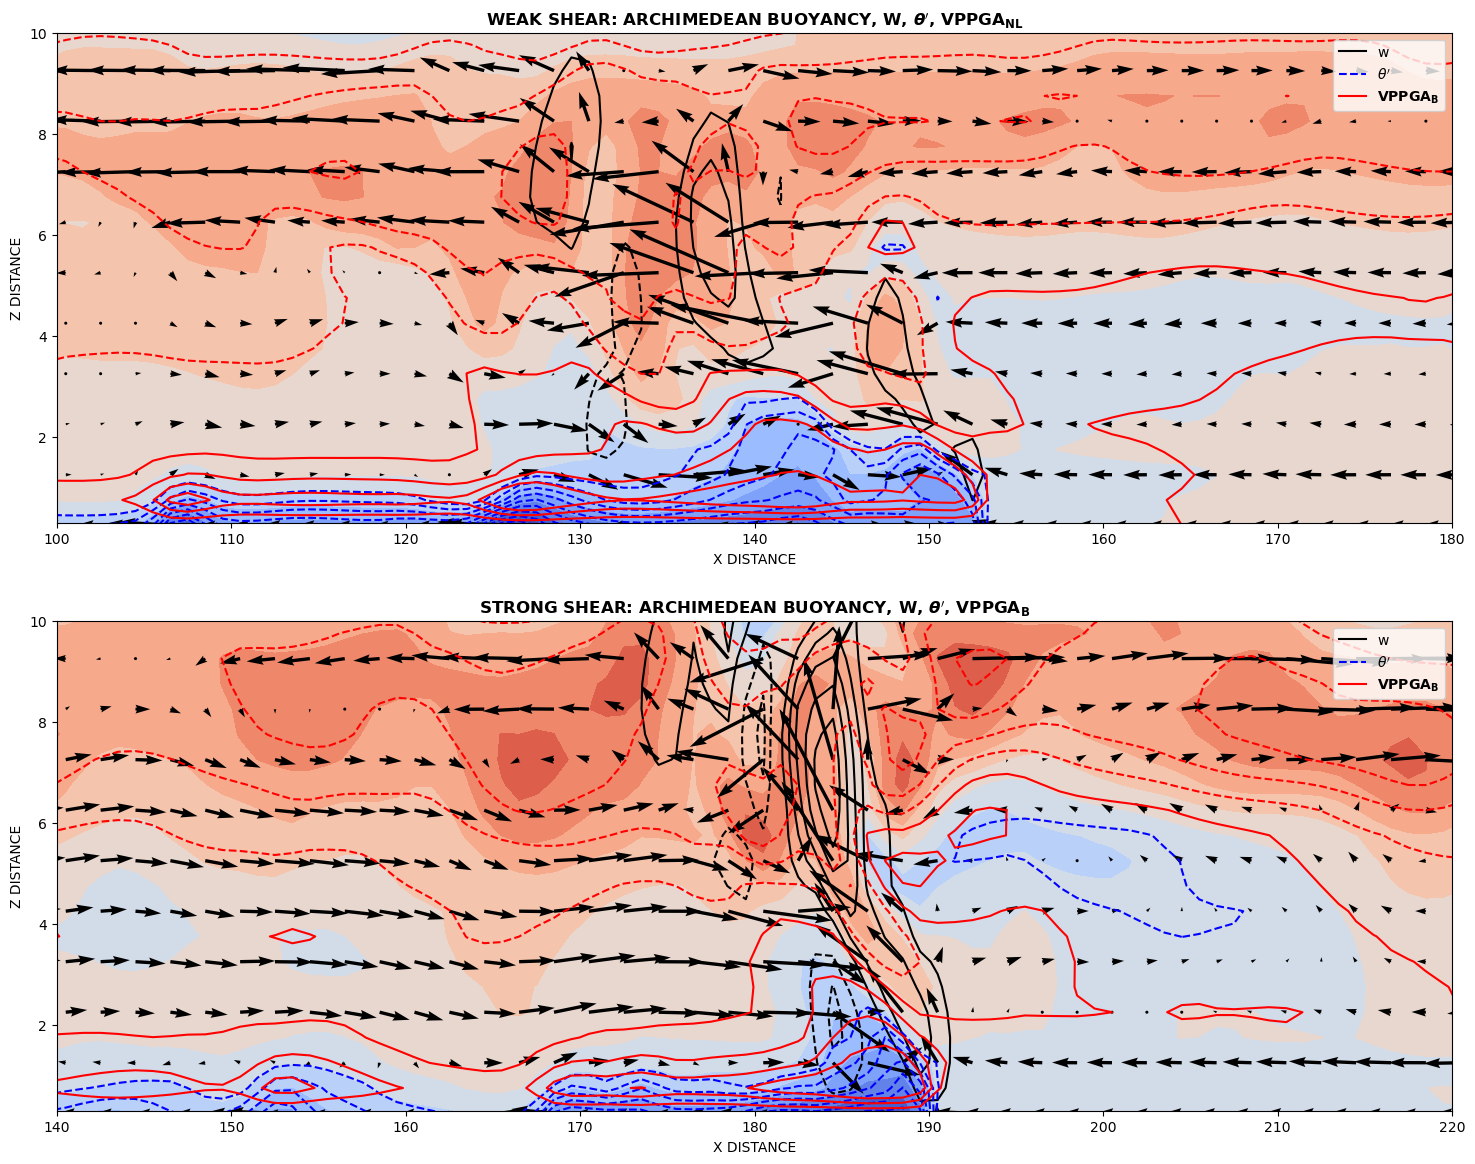

In [96]:
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.contourf(x1,z1,buoy1.isel(yh=0),cmap='coolwarm',
             levels=np.arange(-.3,.35,.05),extend='both')
ax1.contour(x1,z1,w1.isel(yh=0),levels=np.arange(5,30,5),colors='k')
ax1.contour(x1,z1,w1.isel(yh=0),levels=np.arange(-20,0,5),colors='k',
            linestyle='dashed')
ax1.contour(x1,z1,th1.isel(yh=0),levels=np.arange(-14,0,1),
           colors='blue')
ax1.contour(x1,z1,bvppgf1.isel(yh=0,zf=slice(0,40)),
           levels=np.arange(-.2,.2,.05),colors='red')
ax1.set_title(r'WEAK SHEAR: ARCHIMEDEAN BUOYANCY, W, $\boldsymbol{\theta}^{\prime}$, $\mathbf{VPPGA}_{\mathbf{NL}}$', fontweight='bold')

ax2.contourf(x2,z2,buoy2.isel(yh=0),cmap='coolwarm',
             levels=np.arange(-.3,.35,.05),extend='both')
ax2.contour(x2,z2,w2.isel(yh=0),levels=np.arange(5,30,5),colors='k')
ax2.contour(x2,z2,w2.isel(yh=0),levels=np.arange(-20,0,5),colors='k',
            linestyle='dashed')
ax2.contour(x2,z2,th2.isel(yh=0),levels=np.arange(-14,0,1),
           colors='blue')
ax2.contour(x2,z2,bvppgf2.isel(yh=0,zf=slice(0,40)),
           levels=np.arange(-.2,.2,.05),colors='red')
ax2.set_title(r'STRONG SHEAR: ARCHIMEDEAN BUOYANCY, W, $\boldsymbol{\theta}^{\prime}$, $\mathbf{VPPGA}_{\mathbf{B}}$', fontweight='bold')

skip=2
q1 = ax1.quiver(x1[::skip],z1[::skip],
         u1[::skip,::skip],
         w1.isel(yh=0)[::skip,::skip],
          scale=400) 
q2 = ax2.quiver(x2[::skip],z2[::skip],
          u2[::skip,::skip],
          w2.isel(yh=0)[::skip,::skip],
          scale=400) 


black_line = mlines.Line2D([], [], color='k', label='w')
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label=r'${\theta}^{\prime}$')
red_line = mlines.Line2D([], [], color='red', label=r'$\mathbf{VPPGA}_{\mathbf{B}}$')

ax1.legend(handles=[black_line,blue_line,red_line], loc='upper right')
ax2.legend(handles=[black_line,blue_line,red_line], loc='upper right')

ax1.set_xlabel('X DISTANCE')
ax1.set_ylabel('Z DISTANCE')

ax1.set_xlim(100,180)
ax2.set_xlim(140,220)
ax1.set_ylim(.3,10)
ax2.set_ylim(.3,10)


ax2.set_xlabel('X DISTANCE')
ax2.set_ylabel('Z DISTANCE');

In the above plots, buoyancy is in the colorfill (blue - negative and red - positive). The black contours (solid) are vertical velocity > 5 m/s and (dashed) are vertical velocitu < -5 m/s. Potential temperature perturbations are negative in the dashed blue contours and buoyancy perturbation pressure gradient accelerations are negative in the red dashed contours and positive in the red solid contours. In the strong and weak shear cases, near the surface we see positive buoyancy VPPGA just above the buoyancy minimum. This is associated with negative buoyancy pressure perturbations atop negatively buoyant plumes. Atop the positive buoyancy maxima, in both cases, we see negative buoyancy VPPGA associated with positive buoyancy pressure perturbations atop positively buoyancy plumes, that act against their rising motion. This is consistent with the conceptual theory we have learned in class.

<h3>8)</h3>

In [74]:
nlvppgf1 = ds1['pgraddn']
nlvppgf2 = ds2['pgraddn']

In [75]:
nlvppgf1.min(),  nlvppgf1.max(), nlvppgf2.min(), nlvppgf2.max()

(<xarray.DataArray 'pgraddn' ()> Size: 4B
 array(-0.09157709, dtype=float32)
 Coordinates:
     time     timedelta64[ns] 8B 02:30:00,
 <xarray.DataArray 'pgraddn' ()> Size: 4B
 array(0.08596145, dtype=float32)
 Coordinates:
     time     timedelta64[ns] 8B 02:30:00,
 <xarray.DataArray 'pgraddn' ()> Size: 4B
 array(-0.19063774, dtype=float32)
 Coordinates:
     time     timedelta64[ns] 8B 02:30:00,
 <xarray.DataArray 'pgraddn' ()> Size: 4B
 array(0.11492787, dtype=float32)
 Coordinates:
     time     timedelta64[ns] 8B 02:30:00)

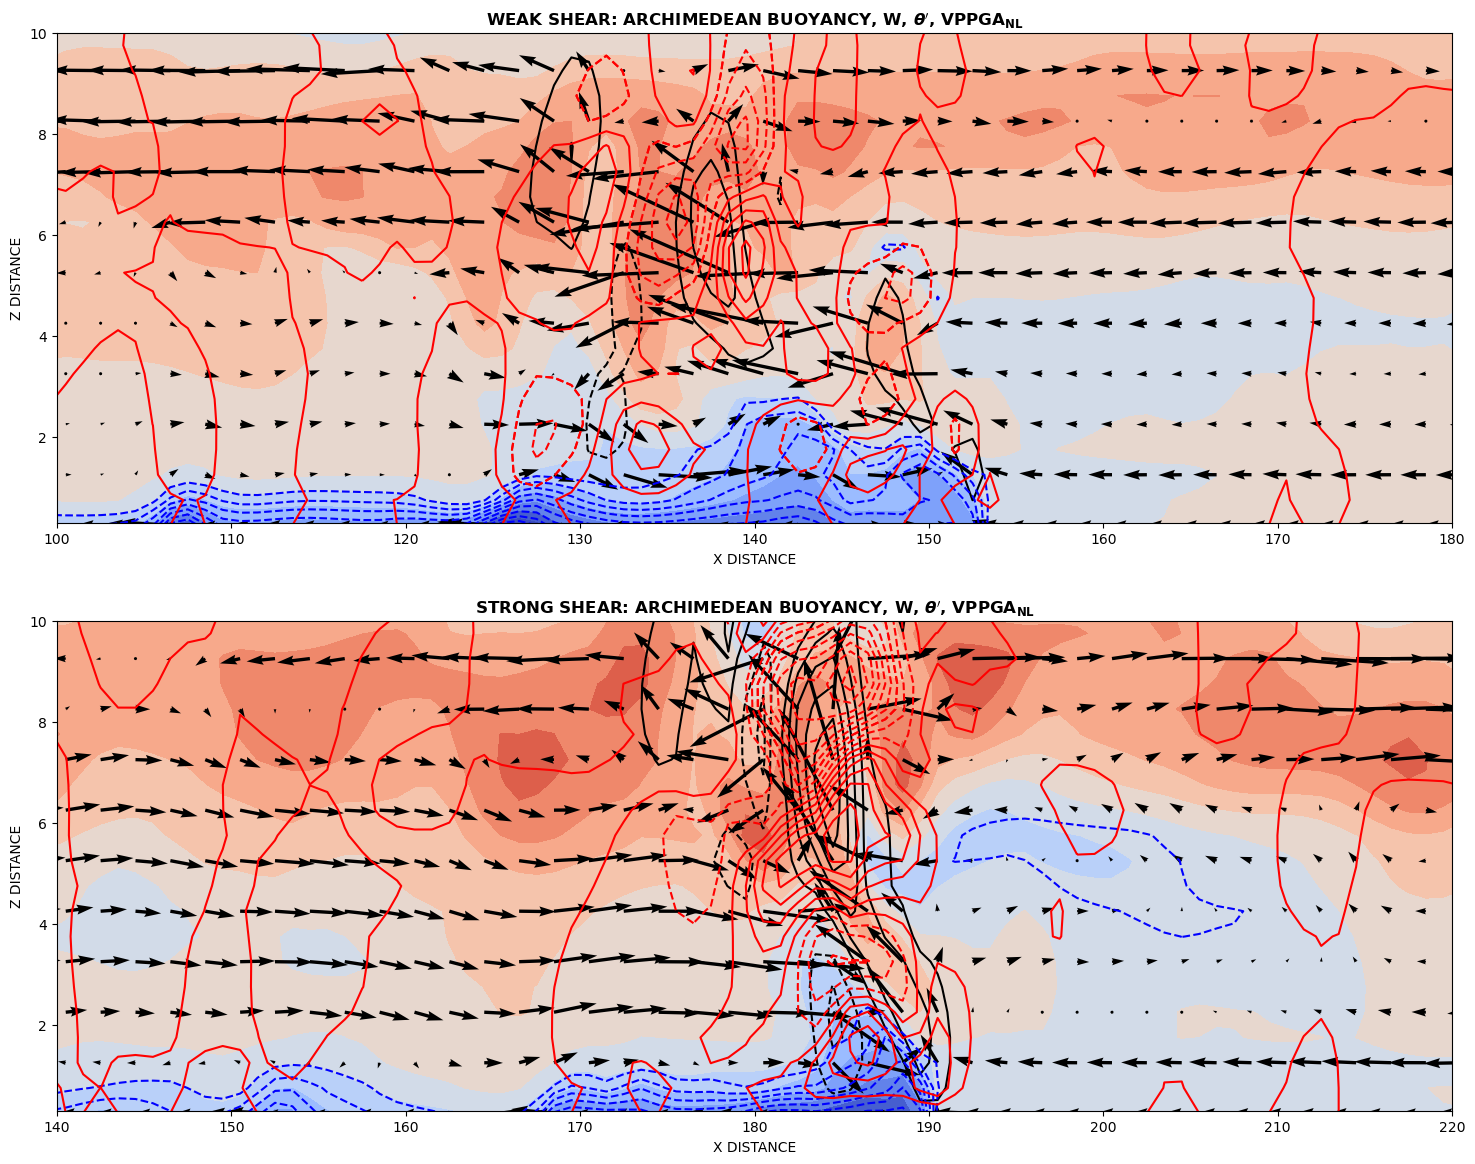

In [95]:
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.contourf(x1,z1,buoy1.isel(yh=0),cmap='coolwarm',
             levels=np.arange(-.3,.35,.05),extend='both')
ax1.contour(x1,z1,w1.isel(yh=0),levels=np.arange(5,30,5),colors='k')
ax1.contour(x1,z1,w1.isel(yh=0),levels=np.arange(-20,0,5),colors='k',
            linestyle='dashed')
ax1.contour(x1,z1,th1.isel(yh=0),levels=np.arange(-14,0,1),
           colors='blue')
ax1.contour(x1,z1,nlvppgf1.isel(yh=0,zf=slice(0,40)),
           levels=np.arange(-.2,0,.02),colors='red', linestyle='dashed')
ax1.contour(x1,z1,nlvppgf1.isel(yh=0,zf=slice(0,40)),
           levels=np.arange(-.02,.22,.02),colors='red', linestyle='solid')
ax1.set_title(r'WEAK SHEAR: ARCHIMEDEAN BUOYANCY, W, $\boldsymbol{\theta}^{\prime}$, $\mathbf{VPPGA}_{\mathbf{NL}}$', fontweight='bold')

ax2.contourf(x2,z2,buoy2.isel(yh=0),cmap='coolwarm',
             levels=np.arange(-.3,.35,.05),extend='both')
ax2.contour(x2,z2,w2.isel(yh=0),levels=np.arange(5,30,5),colors='k')
ax2.contour(x2,z2,w2.isel(yh=0),levels=np.arange(-20,0,5),colors='k',
            linestyle='dashed')
ax2.contour(x2,z2,th2.isel(yh=0),levels=np.arange(-14,0,1),
           colors='blue')
ax2.contour(x2,z2,nlvppgf2.isel(yh=0,zf=slice(0,40)),
           levels=np.arange(-.2,-.04,.02),colors='red', linestyle='dashed')
ax2.contour(x2,z2,nlvppgf2.isel(yh=0,zf=slice(0,40)),
           levels=np.arange(-.06,.22,.02),colors='red', linestyle='solid')
ax2.set_title(r'STRONG SHEAR: ARCHIMEDEAN BUOYANCY, W, $\boldsymbol{\theta}^{\prime}$, $\mathbf{VPPGA}_{\mathbf{NL}}$', fontweight='bold')


skip=2
q1 = ax1.quiver(x1[::skip],z1[::skip],
         u1[::skip,::skip],
         w1.isel(yh=0)[::skip,::skip],
          scale=400) 
q2 = ax2.quiver(x2[::skip],z2[::skip],
          u2[::skip,::skip],
          w2.isel(yh=0)[::skip,::skip],
          scale=400) 



blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label=r'${\theta}^{\prime}$')
red_line = mlines.Line2D([], [], color='red', label=r'${\theta}^{\prime}$')

ax.legend(handles=[blue_line], loc='upper right')

ax1.set_xlabel('X DISTANCE')
ax1.set_ylabel('Z DISTANCE')

ax1.set_xlim(100,180)
ax2.set_xlim(140,220)
ax1.set_ylim(.3,10)
ax2.set_ylim(.3,10)

ax2.set_xlabel('X DISTANCE')
ax2.set_ylabel('Z DISTANCE');

In the above plots, buoyancy is in the colorfill (blue - negative and red - positive). The black contours (solid) are vertical velocity > 5 m/s and (dashed) are vertical velocitu < -5 m/s. Potential temperature perturbations are negative in the dashed blue contours and nonlinear dynamic perturbation pressure gradient accelerations are negative in the red dashed contours and positive in the red solid contours. In the strong shear case, we see negative values of VPPGA just above the surface, around 3-5 km. This is likely associated with a downward directed VPPGF, as a result of the mid-level low from the rear inflow jet. It is also assicated with the fact that there is some curvature to the flow there, resulting in vorticity-related nonlinear dynamic negative pressure perturbations. At the surface, we see positive values of nonlinear VPPGA. This is likely associated with deformation of the flow as the wind vectors slow down and change direction across the cold pool interface (decelleration). This effect is less pronounced in the weak shear case, where the circulations are weaker in general.

<h3>9)</h3>

The updrafts are tilted more rearward over the cold pool in the weak shear simulation. This is because in the weak shear case, the strength of the cold pool circulation was stronger than that of the shear circulation. This led to the updrafts being tilted upshear in the weak shear case. Updrafts were more upright in the strong shear case, where the strength of the vorticity associated with the leading edge of the gust front and that of the vertical shear were more in balance. This is consistent with the conceptual theory we have learned in class.

# PART 3

<h3>10)</h3>

In [27]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SUPERCELL_RUNS/'
ds1 = xr.open_dataset(path + 'STRAIGHT_HODOGRAPH/run/cm1out.nc')
ds2 = xr.open_dataset(path + 'CURVED_HODOGRAPH/run/cm1out.nc')

In [28]:
ds1 = ds1.isel(time=0,xh=0,yh=0)
u1 = ds1['uinterp']
v1 = ds1['vinterp']
ds2 = ds2.isel(time=0,xh=0,yh=0)
u2 = ds2['uinterp']
v2 = ds2['vinterp']

Text(0.5, 1.0, 'CURVED HODOGRAPH')

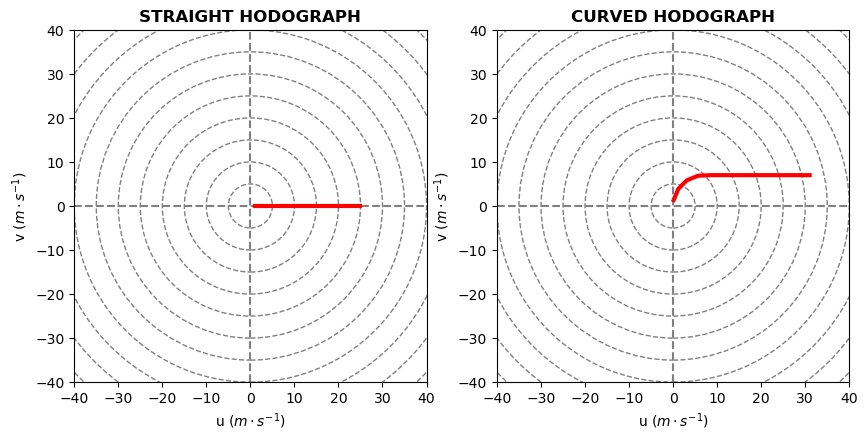

In [29]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

h = Hodograph(ax1, component_range=40)
h.add_grid(increment=5)
h.plot(u1,v1,color='red')

h = Hodograph(ax2, component_range=40)
h.add_grid(increment=5)
h.plot(u2,v2,color='red')

ax1.set_xlabel(r'u ($m \cdot s^{-1}$)')
ax2.set_xlabel(r'u ($m \cdot s^{-1}$)')
ax1.set_ylabel(r'v ($m \cdot s^{-1}$)')
ax2.set_ylabel(r'v ($m \cdot s^{-1}$)')

ax1.set_title('STRAIGHT HODOGRAPH', fontweight='bold')
ax2.set_title('CURVED HODOGRAPH', fontweight='bold')

<h3>11)</h3>

In [30]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SUPERCELL_RUNS/'
ds1 = xr.open_dataset(path + 'STRAIGHT_HODOGRAPH/run/cm1out_stats.nc')
ds2 = xr.open_dataset(path + 'CURVED_HODOGRAPH/run/cm1out_stats.nc')

In [31]:
time1 = ds1['time']
wmax1 = ds1['wmax']
time_x1 = np.arange(0,181,1)
time2 = ds2['time']
wmax2 = ds2['wmax']
time_x2 = np.arange(0,181,1)

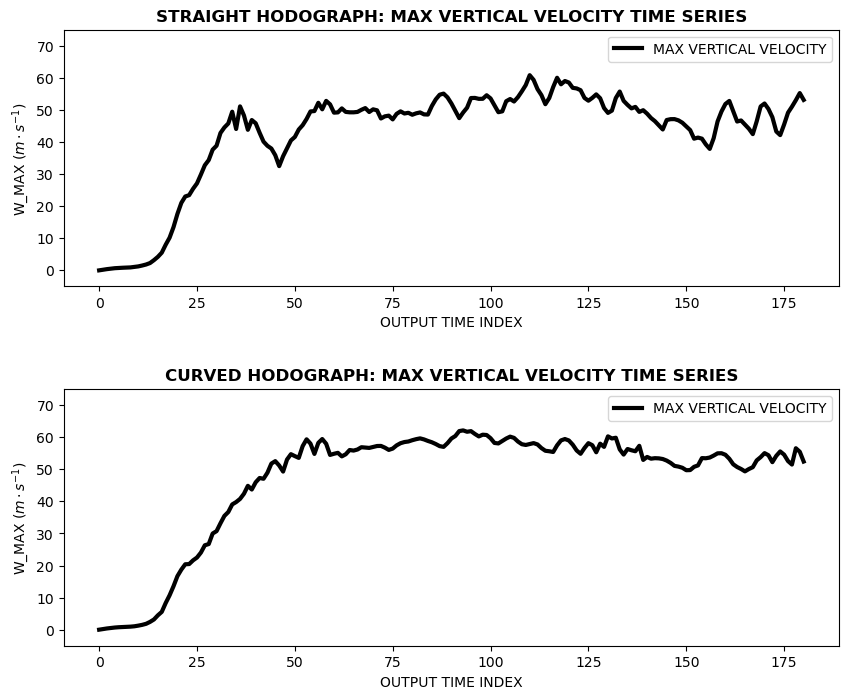

In [32]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.4)
fig.tight_layout()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(time_x1, wmax1, linewidth=3,
        color='k', label='MAX VERTICAL VELOCITY')
ax1.legend()
ax1.set_xlabel('OUTPUT TIME INDEX')
ax1.set_ylim(-5,75)
ax1.set_ylabel(r'W_MAX ($ m \cdot s^{-1}) $')
ax1.set_title('STRAIGHT HODOGRAPH: MAX VERTICAL VELOCITY TIME SERIES',
             fontweight='bold')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(time_x2, wmax2, linewidth=3,
        color='k', label='MAX VERTICAL VELOCITY')
ax2.legend()
ax2.set_xlabel('OUTPUT TIME INDEX')
ax2.set_ylim(-5,75)
ax2.set_ylabel(r'W_MAX ($ m \cdot s^{-1}) $')
ax2.set_title('CURVED HODOGRAPH: MAX VERTICAL VELOCITY TIME SERIES',
             fontweight='bold');

The maximum vertical velocity in the curved hodograph simulation is more steady after the 50th output time as compared to the straight hodograoh simulation. The max vertical velocity in the curved hodograph simulation is also higher, in general, than the straight hodograph simulation. 

<h3>12)</h3>

<h3>13)</h3>

In [187]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SUPERCELL_RUNS/'
ds1 = xr.open_dataset(path + 'STRAIGHT_HODOGRAPH/run/cm1out.nc')
ds2 = xr.open_dataset(path + 'CURVED_HODOGRAPH/run/cm1out.nc')

u1 = ds1['uinterp'].sel(zh=4.25)
v1 = ds1['vinterp'].sel(zh=4.25)
w1 = ds1['winterp'].sel(zh=4.25)
x1 = ds1.xh
y1 = ds1.yh
z1 = ds1.zh

u2 = ds2['uinterp'].sel(zh=4.25)
v2 = ds2['vinterp'].sel(zh=4.25)
w2 = ds2['winterp'].sel(zh=4.25)
x2 = ds2.xh
y2 = ds2.yh
z2 = ds2.zh

In [188]:
times = ds1.isel(time=slice(1,37)).time
i=1
list1 = [] 
for i in range(len(times)):
    print(np.where(w1.isel(time=i)==w1.isel(time=i).max()))
    query = (np.where(w1.isel(time=i)==w1.isel(time=i).max()))
    list1.append(query)
    i=i+1

times = ds2.isel(time=slice(1,37)).time
i=1
list2 = [] 
for i in range(len(times)):
    print(np.where(w2.isel(time=i)==w2.isel(time=i).max()))
    query = (np.where(w2.isel(time=i)==w2.isel(time=i).max()))
    list2.append(query)
    i=i+1

(array([  0,   0,   0, ..., 199, 199, 199]), array([  0,   1,   2, ..., 247, 248, 249]))
(array([ 99, 100]), array([45, 45]))
(array([ 99, 100]), array([43, 43]))
(array([ 99, 100]), array([51, 51]))
(array([ 99, 100]), array([55, 55]))
(array([ 98, 101]), array([57, 57]))
(array([ 98, 101]), array([60, 60]))
(array([ 98, 101]), array([63, 63]))
(array([ 97, 102]), array([67, 67]))
(array([ 95, 104]), array([69, 69]))
(array([ 95, 104]), array([72, 72]))
(array([ 94, 105]), array([75, 75]))
(array([ 94, 105]), array([80, 80]))
(array([ 93, 106]), array([83, 83]))
(array([ 92, 107]), array([85, 85]))
(array([ 91, 108]), array([88, 88]))
(array([ 90, 109]), array([92, 92]))
(array([ 90, 109]), array([97, 97]))
(array([ 89, 110]), array([100, 100]))
(array([ 88, 111]), array([104, 104]))
(array([ 86, 113]), array([106, 106]))
(array([ 85, 114]), array([111, 111]))
(array([ 84, 115]), array([115, 115]))
(array([ 80, 119]), array([117, 117]))
(array([ 79, 120]), array([121, 121]))
(array([ 

In [189]:
list1 = list1[1:]
list2 = list2[1:]

In [190]:
list1

[(array([ 99, 100]), array([45, 45])),
 (array([ 99, 100]), array([43, 43])),
 (array([ 99, 100]), array([51, 51])),
 (array([ 99, 100]), array([55, 55])),
 (array([ 98, 101]), array([57, 57])),
 (array([ 98, 101]), array([60, 60])),
 (array([ 98, 101]), array([63, 63])),
 (array([ 97, 102]), array([67, 67])),
 (array([ 95, 104]), array([69, 69])),
 (array([ 95, 104]), array([72, 72])),
 (array([ 94, 105]), array([75, 75])),
 (array([ 94, 105]), array([80, 80])),
 (array([ 93, 106]), array([83, 83])),
 (array([ 92, 107]), array([85, 85])),
 (array([ 91, 108]), array([88, 88])),
 (array([ 90, 109]), array([92, 92])),
 (array([ 90, 109]), array([97, 97])),
 (array([ 89, 110]), array([100, 100])),
 (array([ 88, 111]), array([104, 104])),
 (array([ 86, 113]), array([106, 106])),
 (array([ 85, 114]), array([111, 111])),
 (array([ 84, 115]), array([115, 115])),
 (array([ 80, 119]), array([117, 117])),
 (array([ 79, 120]), array([121, 121])),
 (array([ 78, 121]), array([125, 125])),
 (array([

In [191]:
np.where(w1.isel(time=10)==w1.isel(time=10).max())[0][0], np.where(w1.isel(time=10)==w1.isel(time=10).max())[1][0]

(np.int64(95), np.int64(72))

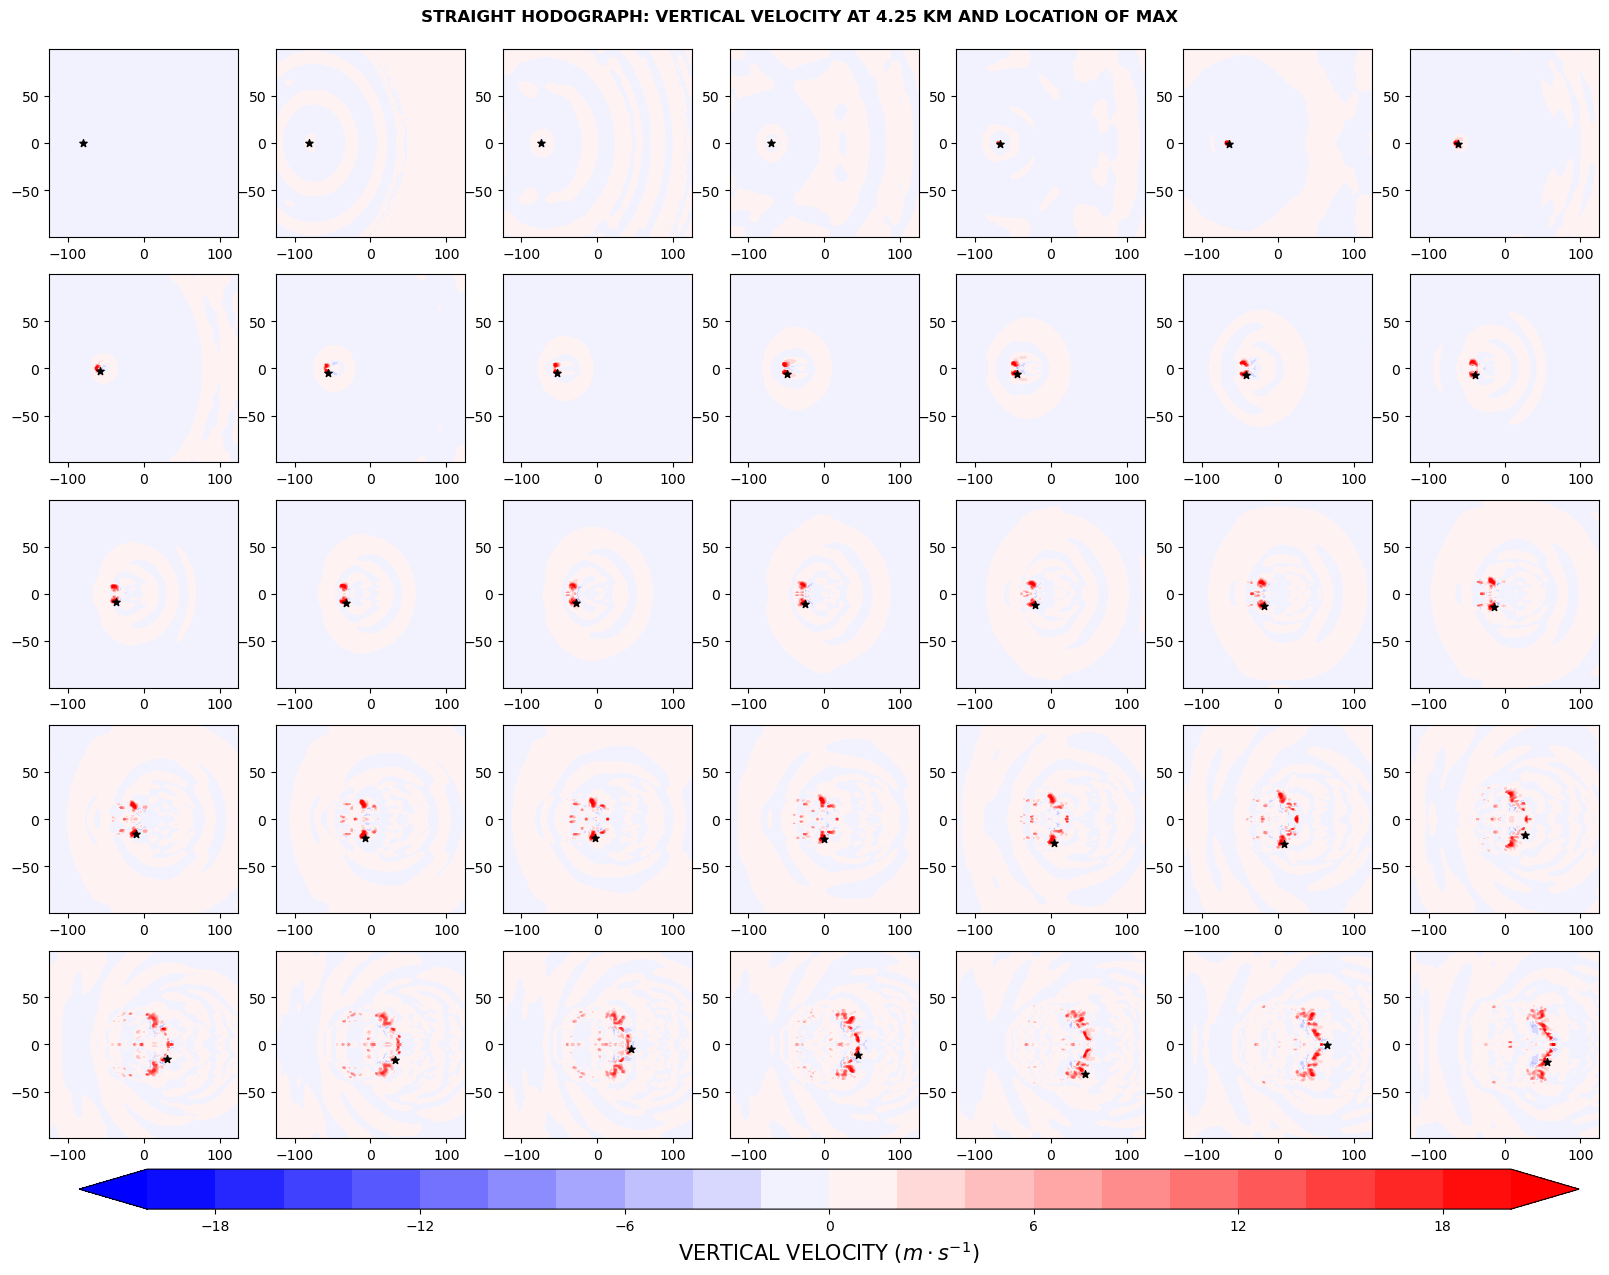

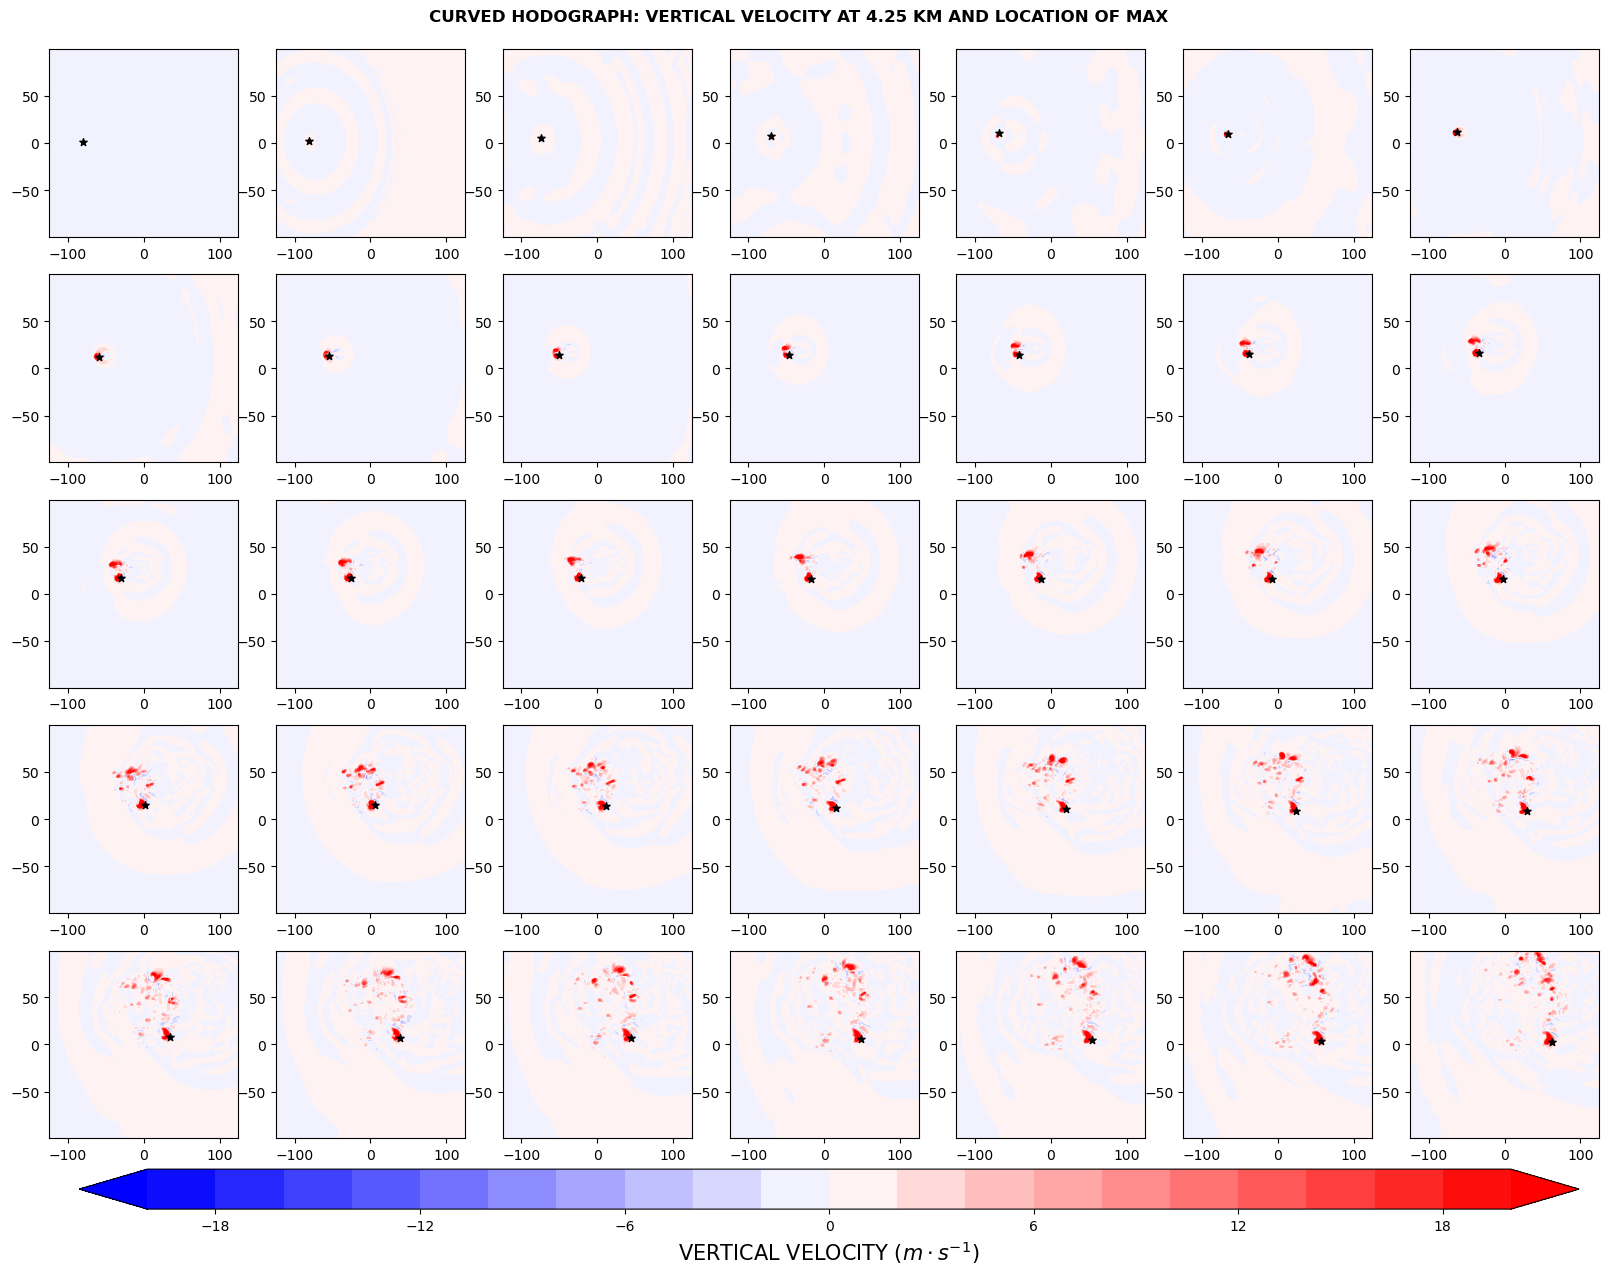

In [200]:
fig = plt.figure(figsize=(20,20))
x_list1 = []
y_list1 = []
for time in range(len(list1)):
    ax = fig.add_subplot(7,7,time+1)
    cf = ax.contourf(x1,y1,w1.isel(time=time), cmap='bwr', levels=np.arange(-20,22,2), extend='both')
    ax.scatter(x1[list1[time][1][0]],y1[list1[time][0][0]], color='k', s=30, marker='*')
    #print(x1[list[time][1][0]].values,y1[list[time][0][0]].values)
    x_list1.append(x1[list1[time][1][0]].values)
    y_list1.append(y1[list1[time][0][0]].values)
cbar_ax = fig.add_axes([0.14, 0.3, 0.75, 0.02])  # left, bottom, width, height
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'VERTICAL VELOCITY ($ m \cdot s^{-1} $)', fontsize=15)
fig.suptitle('STRAIGHT HODOGRAPH: VERTICAL VELOCITY AT 4.25 KM AND LOCATION OF MAX', fontweight='bold', y=.9);

fig = plt.figure(figsize=(20,20))
x_list2 = []
y_list2 = []
for time in range(len(list2)):
    ax = fig.add_subplot(7,7,time+1)
    cf = ax.contourf(x2,y2,w2.isel(time=time), cmap='bwr', levels=np.arange(-20,22,2), extend='both')
    ax.scatter(x2[list2[time][1][0]],y2[list2[time][0][0]], color='k', s=30, marker='*')
    #print(x1[list[time][1][0]].values,y1[list[time][0][0]].values)
    x_list2.append(x2[list2[time][1][0]].values)
    y_list2.append(y2[list2[time][0][0]].values)
cbar_ax = fig.add_axes([0.14, 0.3, 0.75, 0.02])  # left, bottom, width, height
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'VERTICAL VELOCITY ($ m \cdot s^{-1} $)', fontsize=15)
fig.suptitle('CURVED HODOGRAPH: VERTICAL VELOCITY AT 4.25 KM AND LOCATION OF MAX', fontweight='bold', y=.9);

In [201]:
x_list1 = np.array(x_list1)
y_list1 = np.array(y_list1)

x_list2 = np.array(x_list2)
y_list2 = np.array(y_list2)

In [202]:
storm_motion_x1 = np.gradient(x_list1)
storm_motion_y1 = np.gradient(y_list1)
mean_smx1 = np.mean(storm_motion_x1)
mean_smy1 = np.mean(storm_motion_y1)

storm_motion_x2 = np.gradient(x_list2)
storm_motion_y2 = np.gradient(y_list2)
mean_smx2 = np.mean(storm_motion_x2)
mean_smy2 = np.mean(storm_motion_y2)

In [203]:
mean_smv1 = [mean_smx1, mean_smy1]

mean_smv2 = [mean_smx2, mean_smy2]

In [204]:
mean_smv1

[np.float32(3.7428572), np.float32(-0.7714286)]

In [205]:
mean_smv2

[np.float32(4.114286), np.float32(0.028571408)]

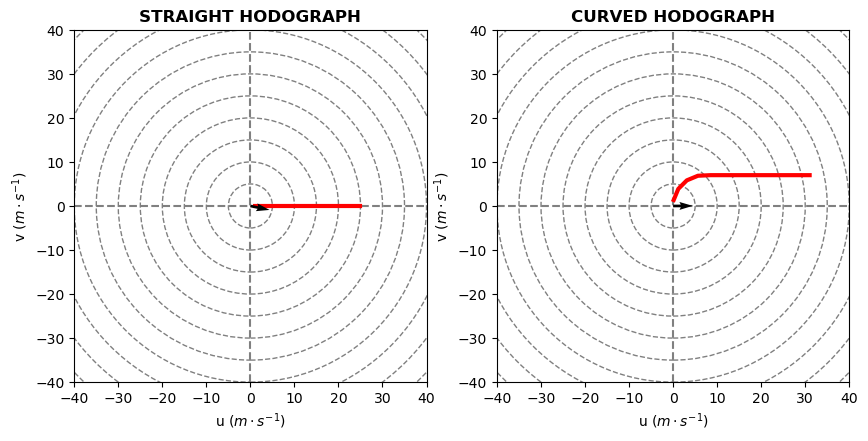

In [206]:
path = '/network/daes/spare11/atm612/HOMEWORK_ASSIGNMENT_4/SUPERCELL_RUNS/'
ds1 = xr.open_dataset(path + 'STRAIGHT_HODOGRAPH/run/cm1out.nc')
ds2 = xr.open_dataset(path + 'CURVED_HODOGRAPH/run/cm1out.nc')

ds1 = ds1.isel(time=0,xh=0,yh=0)
u1 = ds1['uinterp']
v1 = ds1['vinterp']
ds2 = ds2.isel(time=0,xh=0,yh=0)
u2 = ds2['uinterp']
v2 = ds2['vinterp']

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

h = Hodograph(ax1, component_range=40)
h.add_grid(increment=5)
h.plot(u1,v1,color='red')

h = Hodograph(ax2, component_range=40)
h.add_grid(increment=5)
h.plot(u2,v2,color='red')

ax1.set_xlabel(r'u ($m \cdot s^{-1}$)')
ax2.set_xlabel(r'u ($m \cdot s^{-1}$)')
ax1.set_ylabel(r'v ($m \cdot s^{-1}$)')
ax2.set_ylabel(r'v ($m \cdot s^{-1}$)')

ax1.set_title('STRAIGHT HODOGRAPH', fontweight='bold')
ax2.set_title('CURVED HODOGRAPH', fontweight='bold')

ax1.quiver(mean_smv1[0], mean_smv1[1], zorder=2)
ax2.quiver(mean_smv2[0], mean_smv2[1], zorder=2);

<h3>14)</h3>

<h3>15)</h3>

# BONUS

<h3>1)</h3>

<h3>2)</h3>